## TO_DO: Exercise - Use Decision Tree to classify dataset Iris

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1oUN5YCdQisXIYQIGioSIe75KSsJzdxPl' -O iris.csv

--2023-09-10 08:36:12--  https://docs.google.com/uc?export=download&id=1oUN5YCdQisXIYQIGioSIe75KSsJzdxPl
Resolving docs.google.com (docs.google.com)... 142.251.120.139, 142.251.120.100, 142.251.120.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.120.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/narb10gv3s210ru7n447r22aeu5i5nud/1694334900000/05830297694632628921/*/1oUN5YCdQisXIYQIGioSIe75KSsJzdxPl?e=download&uuid=0a92af70-4d78-46c0-b28d-c6bb25e8f7dc [following]
--2023-09-10 08:36:13--  https://doc-14-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/narb10gv3s210ru7n447r22aeu5i5nud/1694334900000/05830297694632628921/*/1oUN5YCdQisXIYQIGioSIe75KSsJzdxPl?e=download&uuid=0a92af70-4d78-46c0-b28d-c6bb25e8f7dc
Resolving doc-14-28-docs.googleusercontent.com (doc-14-28-docs.googleusercontent.com)... 209.85.147.132, 2607:f

In [7]:
# Load the dataset
iris_data = pd.read_csv('iris.csv')
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [9]:
# Prepare data
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [10]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Create and train the Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

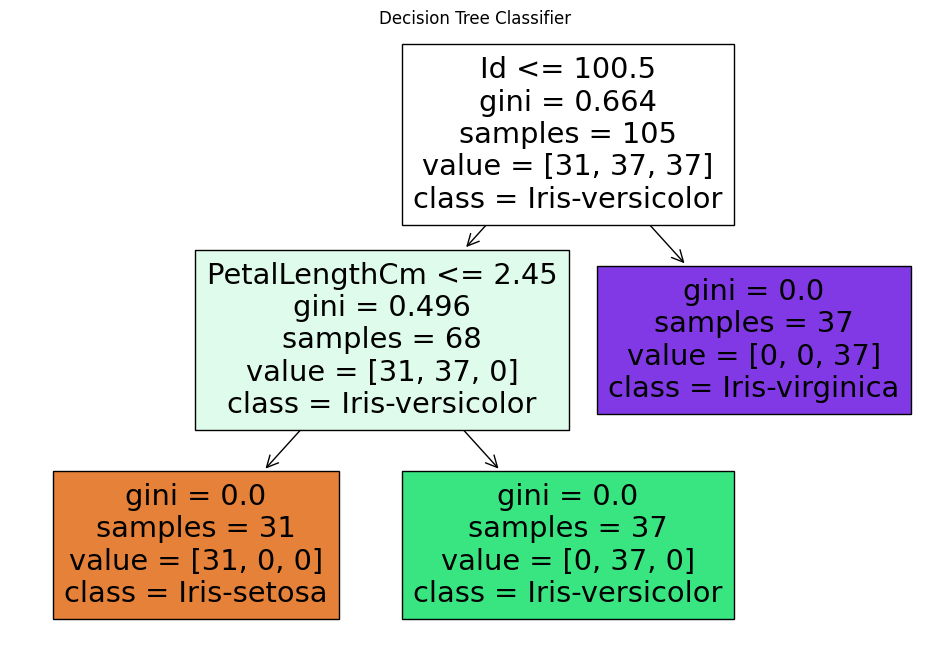

In [17]:
# Plot the Decision Tree graph
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=iris_data['Species'].unique(), filled=True)
plt.title('Decision Tree Classifier')
plt.show()

### Analysis - Decision Tree Visualization result

By following the branches from the root to the leaves, we can understand the decision-making process. For example, if we start at the root and follow the branches, we can see how the model decides the species of an iris flower based on its petal length and petal width.

In [12]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy:.5f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.00000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Model Evaluation Analysis

1.Accuracy: The model achieved an accuracy of approximately 1.00. This indicates that the Decision Tree model is able to correctly classify flower species with high accuracy.

2.Confusion Matrix:
*   The 'Setosa' class, all samples were correctly classified (19 true positives).
*   The 'Versicolor' class, all samples were correctly classified (13 true positives).
*  The 'Virginica' class, all samples were correctly classified (13 true positives).
*   There are no false positives or false negatives for any class, as all values in the confusion matrix are zero.

3.Classification Report

*   High values of precision, recall, and F1-score for all three classes ('Setosa,' 'Versicolor,' 'Virginica') indicate excellent model performance.
*   The model shows perfect precision, recall, and F1-score for all classes, further confirming its high accuracy.